In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [8]:
land_ocean_mask = '/usr/people/botiabo/Fluor_retrieval/Input/land_ocean_mask2_hd.asc'
seamask = np.flipud(np.genfromtxt(land_ocean_mask, skip_header=6))

from mpl_toolkits import axes_grid1
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

def plot_rectangle(bmap, lonmin,lonmax,latmin,latmax):
    xs = [lonmin,lonmax,lonmax,lonmin,lonmin]
    ys = [latmin,latmin,latmax,latmax,latmin]
    bmap.plot(xs, ys,latlon = True,color='white')

In [7]:
paths = ['/usr/people/kooreman/nobackup/data_SIFTER/M02/SIFTER2/Level3/']

paths = ['/usr/people/kooreman/nobackup/data_SIFTER/M01/SIFTER21/Level3/']

start_date  = '2013-01-01'
end_date    = '2016-12-31'
daterange   = pd.date_range(start_date, end_date, freq='A')
months_all  = daterange.month.sum()

#gome2a_yrly = np.zeros((months_all,360,720),float)
gome2b_yrly = np.zeros((months_all,360,720),float)

cont = 0
for ii,dirbf in enumerate(paths):
    
    for single_date in daterange:
        year  = str(single_date.year)
        path_year = dirbf+year
    
        for fmonth in os.listdir(path_year):
 
            #if ii == 0 and fmonth[22:25] != '.nc': continue
            if ii == 0 and fmonth[23:26] != '.nc': continue
            
            ffmonth = path_year+'/'+fmonth
        
            if ii==0:
                #datag2a           = cdf.Dataset(ffmonth) 
                #fs_g2a_v2         = datag2a.variables['Chl_F_monthly_v2'][:]*1000
                #gome2a_yrly[cont] = fs_g2a_v2
                datag2b           = cdf.Dataset(ffmonth) 
                fs_g2b_v2         = datag2b.variables['Chl_F_monthly_v2'][:]*1000
                gome2b_yrly[cont] = fs_g2b_v2*seamask
                cont+=1

In [ ]:
colors = [('Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
          CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, 
          Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r,
          PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r,
          RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, 
          Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r,
          YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, 
          bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
          cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, 
          gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
          gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, 
          jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, 
          prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r,
          terrain, terrain_r, viridis, viridis_r, winter, winter_r']

In [4]:
ga         = np.mean(np.ma.masked_invalid(gome2a_yrly))
gome2a_avg = np.mean(np.ma.masked_invalid(gome2a_yrly),axis=0)
gome2a     = np.ma.masked_where(seamask==0,gome2a_avg)

lllat   = -5
urlat   = 15
lllon   = -90
uprlon  = -60

xx, yy  = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
#map     = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
map     = Basemap(projection='cyl', lat_0=0, lon_0=0)
fig     = plt.figure(1,figsize=(20,20))
ax      = fig.add_subplot(111)
imm     = map.pcolormesh(xx,yy,gome2a,cmap='hsv_r') # hsv_r,seismic,gist_stern
cb      = add_colorbar(imm)

imm.set_clim(vmin=-2, vmax=2)
#ax.set_title('(Global  mean = %0.4f [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$])'%(ga),fontsize=12)
cb.set_label('GOME2A - Far red SiF [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=14)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/SIFTERv2_Composite.png',bbox_inches='tight',DPI=1000)
plt.show()


NameError: name 'gome2a_yrly' is not defined

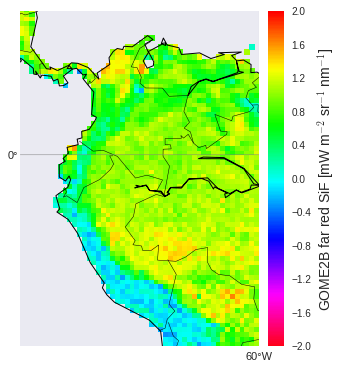

In [13]:
gb         = np.mean(np.ma.masked_invalid(gome2b_yrly))
gome2b_avg = np.mean(np.ma.masked_invalid(gome2b_yrly),axis=0)
gome2b     = np.ma.masked_where(seamask==0,gome2b_avg)

lllat   = -20
urlat   = 15
lllon   = -85
uprlon  = -60

xx, yy  = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
#map     = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
map     = Basemap(projection='cyl', lat_0=0, lon_0=0)

fig     = plt.figure(1,figsize=(15,6))
ax      = fig.add_subplot(111)
imm     = map.pcolormesh(xx,yy,gome2b,cmap='hsv_r') # hsv_r,seismic,gist_stern
cb      = add_colorbar(imm)
imm.set_clim(vmin=-2, vmax=2)
#ax.set_title('(Global  mean = %0.4f [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$])'%(ga),fontsize=12)
cb.set_label('GOME2B far red SiF [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]',fontsize=14)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/SIFTERv2_Composite.png',bbox_inches='tight',DPI=1000)
plt.show()

